# Jakub Hulek


## I. Supervised Learning - Classification

In [1]:
import torch
import torchvision

import torch
import torch.nn as nn
import torch.nn.functional as F

from sklearn.model_selection import train_test_split

In [2]:
fashion_mnist = torchvision.datasets.FashionMNIST('./', download=True, train=True)
fashion_mnist_test = torchvision.datasets.FashionMNIST('./', download=True, train=False)
# data_loader = torch.utils.data.DataLoader(imagenet_data,
#                                           batch_size=4,
#                                           shuffle=True,
#                                           num_workers=args.nThreads)
fashion_mnist.data.shape

100%|██████████| 26.4M/26.4M [00:06<00:00, 4.27MB/s]


Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 1.37MB/s]

Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw




100%|██████████| 4.42M/4.42M [00:00<00:00, 11.7MB/s]


Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 12.1MB/s]

Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



torch.Size([60000, 28, 28])

In [3]:
# Split the dataset
X_train, X_val, y_train, y_val = train_test_split(fashion_mnist.data, fashion_mnist.targets, test_size=0.2, random_state=0)

# Standardize the data
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = fashion_mnist_test.data / 255.0
y_test = fashion_mnist_test.targets
y_test

tensor([9, 2, 1,  ..., 8, 1, 5])

In [4]:
n_classes = len(fashion_mnist.classes)
n_classes

10

In [5]:
y_train_oh = F.one_hot(y_train, n_classes)
y_test_oh = F.one_hot(y_test, n_classes)
y_val_oh = F.one_hot(y_val, n_classes)


In [21]:

class FashionMnistClassifier(nn.Module):
    def __init__(self):
        super(FashionMnistClassifier, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 100)  # 8 features, 16 neurons in first hidden layer
        self.output = nn.Linear(100, n_classes) # Output layer

    def forward(self, x):
        x = self.flatten(x)
        x = F.sigmoid(self.fc1(x))
        x = F.softmax(self.output(x), dim=-1)
        return x

In [22]:
model = FashionMnistClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.02)

inputs = torch.tensor(X_train, dtype=torch.float32)
labels = torch.tensor(y_train_oh, dtype=torch.float32)
val_inputs = torch.tensor(X_val, dtype=torch.float32)
val_labels = torch.tensor(y_val_oh, dtype=torch.float32)

epochs = 200
for epoch in range(epochs):
    # Forward pass
    model.train()
    outputs = model(inputs)
    loss = criterion(outputs, labels)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
      model.eval()
      val_outputs = model(val_inputs)
      val_loss = criterion(val_outputs, val_labels)

      y_pred = torch.argmax(outputs, dim=-1)
      train_acc = torch.sum(y_pred == y_train) / inputs.shape[0]

      y_pred_val = torch.argmax(val_outputs, dim=-1)
      val_acc = torch.sum(y_pred_val == y_val) / val_inputs.shape[0]

    if (epoch+1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Acc:{train_acc.item():.4f}, ValAcc:{val_acc.item():.4f},  Loss: {loss.item():.4f}, ValLoss: {val_loss.item():.4f}')

/tmp/ipykernel_10332/2591089006.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(X_train, dtype=torch.float32)
/tmp/ipykernel_10332/2591089006.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(y_train_oh, dtype=torch.float32)
/tmp/ipykernel_10332/2591089006.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_inputs = torch.tensor(X_val, dtype=torch.float32)
/tmp/ipykernel_10332/2591089006.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().d

Epoch [5/200], Acc:0.5506, ValAcc:0.5952,  Loss: 2.0341, ValLoss: 1.9744
Epoch [10/200], Acc:0.6375, ValAcc:0.6683,  Loss: 1.8458, ValLoss: 1.8353
Epoch [15/200], Acc:0.6796, ValAcc:0.6793,  Loss: 1.7998, ValLoss: 1.7982
Epoch [20/200], Acc:0.6914, ValAcc:0.6916,  Loss: 1.7736, ValLoss: 1.7710
Epoch [25/200], Acc:0.7566, ValAcc:0.7598,  Loss: 1.7266, ValLoss: 1.7200
Epoch [30/200], Acc:0.7819, ValAcc:0.7796,  Loss: 1.6953, ValLoss: 1.6970
Epoch [35/200], Acc:0.7916, ValAcc:0.7897,  Loss: 1.6783, ValLoss: 1.6806
Epoch [40/200], Acc:0.7996, ValAcc:0.7955,  Loss: 1.6689, ValLoss: 1.6723
Epoch [45/200], Acc:0.8064, ValAcc:0.8019,  Loss: 1.6613, ValLoss: 1.6644
Epoch [50/200], Acc:0.8110, ValAcc:0.8073,  Loss: 1.6555, ValLoss: 1.6591
Epoch [55/200], Acc:0.8155, ValAcc:0.8108,  Loss: 1.6509, ValLoss: 1.6553
Epoch [60/200], Acc:0.8191, ValAcc:0.8138,  Loss: 1.6474, ValLoss: 1.6520
Epoch [65/200], Acc:0.8219, ValAcc:0.8167,  Loss: 1.6442, ValLoss: 1.6492
Epoch [70/200], Acc:0.8251, ValAcc:0.81

In [23]:
with torch.no_grad():
    y_predicted = model(torch.tensor(X_test, dtype=torch.float32))
    y_predicted_cls = torch.argmax(y_predicted, dim=-1)
    acc = torch.sum(y_predicted_cls == y_test) / X_test.shape[0]
    print(f'Accuracy: {acc:.4f}')

Accuracy: 0.8283


/tmp/ipykernel_10332/98252114.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_predicted = model(torch.tensor(X_test, dtype=torch.float32))


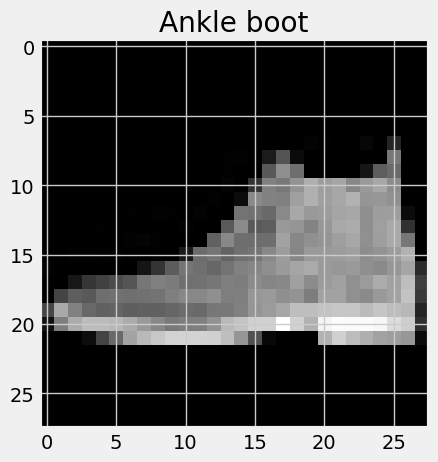

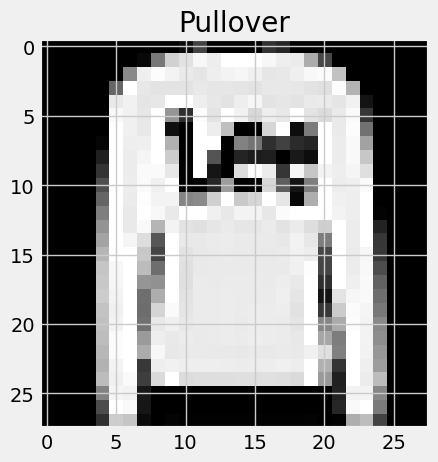

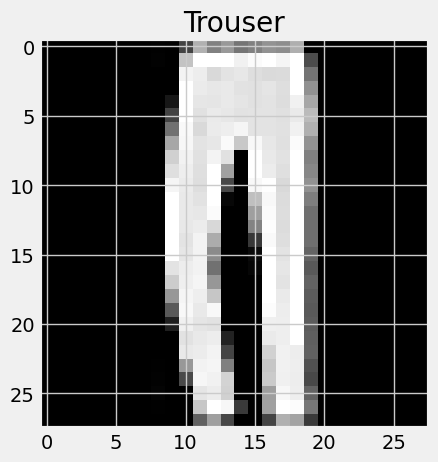

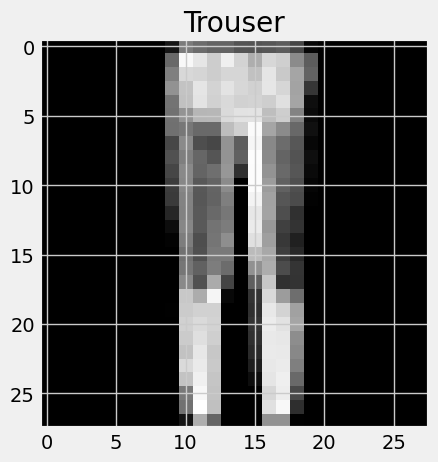

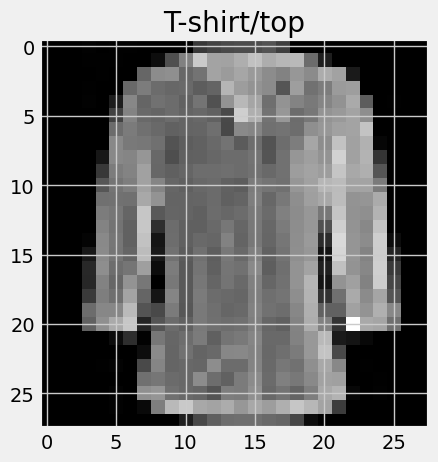

In [24]:
import matplotlib.pyplot as plt

for i in range(5):
  plt.imshow(X_test[i], cmap='gray')
  plt.title(fashion_mnist_test.classes[y_predicted_cls[i]])
  plt.show()

## II. Unsupervised Learning - Dimensionality reduction

In [25]:
import torch
import torchvision

import torch
import torch.nn as nn
import torch.nn.functional as F

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [26]:
# Transforms images to a PyTorch Tensor
tensor_transform = torchvision.transforms.ToTensor()

# Download the MNIST Dataset
dataset = torchvision.datasets.FashionMNIST(root = "./",
                         train = True,
                         download = True,
                         transform = tensor_transform)

# DataLoader is used to load the dataset
# for training
loader = torch.utils.data.DataLoader(dataset = dataset,
                                     batch_size = 32,
                                     shuffle = True)

In [28]:
class AE(torch.nn.Module):
    def __init__(self):
        super().__init__()

        # Building an linear encoder with Linear
        # layer followed by Relu activation function
        # 784 ==> 9
        self.encoder = torch.nn.Sequential(
            torch.nn.Flatten(),
            torch.nn.Linear(28 * 28, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 32),
            torch.nn.ReLU(),
            torch.nn.Linear(32, 16),
            torch.nn.ReLU(),
            torch.nn.Linear(16, 10)
        )

        # Building an linear decoder with Linear
        # layer followed by Relu activation function
        # The Sigmoid activation function
        # outputs the value between 0 and 1
        # 10 ==> 784
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(10, 16),
            torch.nn.ReLU(),
            torch.nn.Linear(16, 32),
            torch.nn.ReLU(),
            torch.nn.Linear(32, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 28 * 28),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [29]:
model = AE()

# Validation using MSE Loss function
loss_function = torch.nn.MSELoss()

# Using an Adam Optimizer with lr = 0.1
optimizer = torch.optim.Adam(model.parameters(),
                             lr=0.001,
                             weight_decay = 1e-8)
epochs = 5
outputs = []
losses = []

for epoch in range(epochs):
    for batch_idx, (image, target) in enumerate(loader):

      # Reshaping the image to (-1, 784)
      image = image.reshape(-1, 28*28)

      # Output of Autoencoder
      reconstructed = model(image)

      # Calculating the loss function
      loss = loss_function(reconstructed, image)

      # The gradients are set to zero,
      # the gradient is computed and stored.
      # .step() performs parameter update
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # Storing the losses in a list for plotting
      losses.append(loss.detach().numpy())
      if batch_idx % 300 == 0:
        print(f"EPOCH {epoch+1} [{batch_idx * len(image)}/{len(loader.dataset)}]"
              f"({(batch_idx * len(image))/len(loader.dataset)*100.0:.1f}%)"
              f" Loss={loss.cpu().data.item():.6f}")
    outputs.append((epoch, image, reconstructed))

# Defining the Plot Style


EPOCH 1 [0/60000](0.0%) Loss=0.170702
EPOCH 1 [9600/60000](16.0%) Loss=0.044245
EPOCH 1 [19200/60000](32.0%) Loss=0.038088
EPOCH 1 [28800/60000](48.0%) Loss=0.035683
EPOCH 1 [38400/60000](64.0%) Loss=0.037916
EPOCH 1 [48000/60000](80.0%) Loss=0.036192
EPOCH 1 [57600/60000](96.0%) Loss=0.032904
EPOCH 2 [0/60000](0.0%) Loss=0.030054
EPOCH 2 [9600/60000](16.0%) Loss=0.029995
EPOCH 2 [19200/60000](32.0%) Loss=0.031539
EPOCH 2 [28800/60000](48.0%) Loss=0.025039
EPOCH 2 [38400/60000](64.0%) Loss=0.025335
EPOCH 2 [48000/60000](80.0%) Loss=0.023824
EPOCH 2 [57600/60000](96.0%) Loss=0.025931
EPOCH 3 [0/60000](0.0%) Loss=0.025023
EPOCH 3 [9600/60000](16.0%) Loss=0.028750
EPOCH 3 [19200/60000](32.0%) Loss=0.026000
EPOCH 3 [28800/60000](48.0%) Loss=0.023421
EPOCH 3 [38400/60000](64.0%) Loss=0.028148
EPOCH 3 [48000/60000](80.0%) Loss=0.024397
EPOCH 3 [57600/60000](96.0%) Loss=0.025600
EPOCH 4 [0/60000](0.0%) Loss=0.021466
EPOCH 4 [9600/60000](16.0%) Loss=0.025603
EPOCH 4 [19200/60000](32.0%) Loss=0

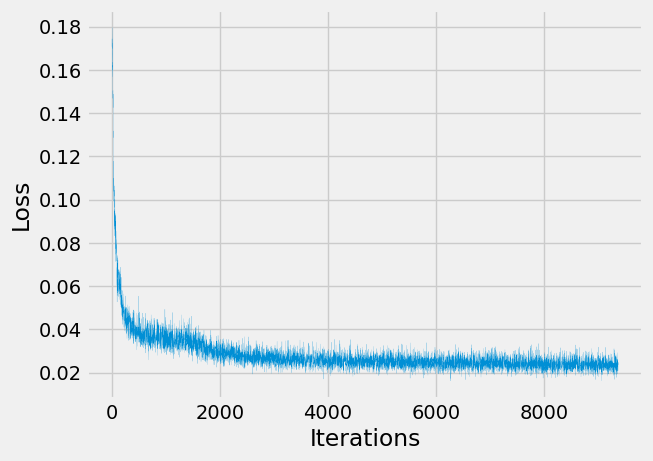

In [30]:
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')

# Plotting the last 100 values
plt.plot(losses, linewidth=0.1)

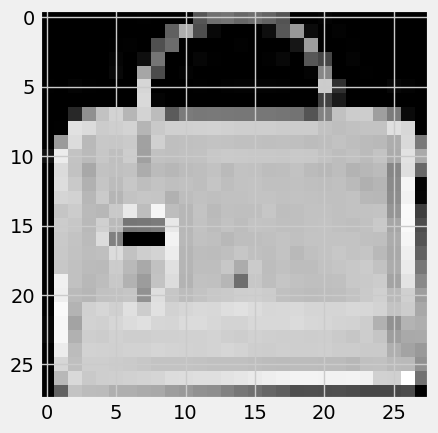

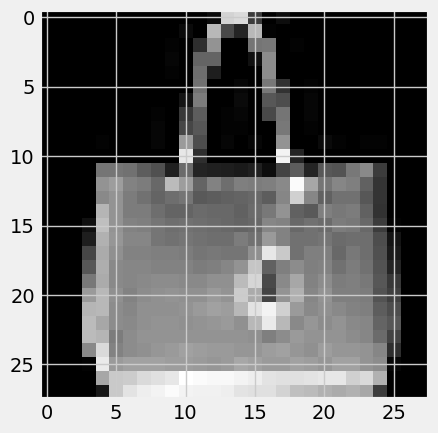

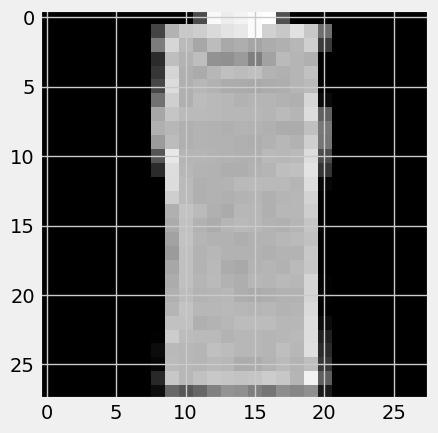

In [31]:
for i, item in enumerate(image):

  # Reshape the array for plotting
  item = item.reshape(-1, 28, 28)
  plt.imshow(item[0].detach().numpy(), cmap='gray' )
  plt.show()
  if i >= 2:
    break


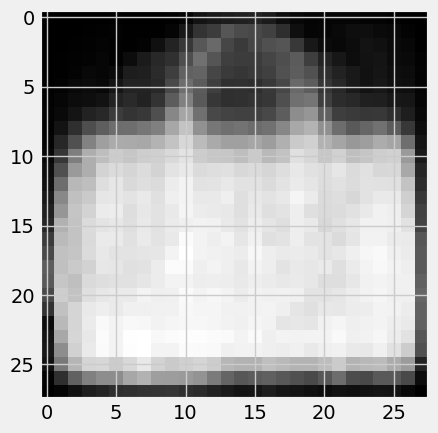

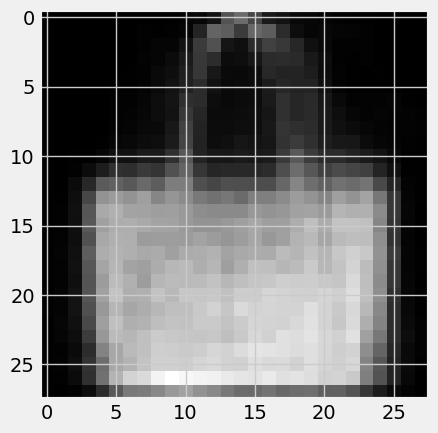

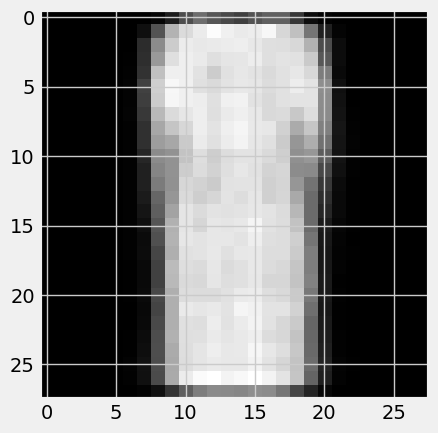

In [32]:

for i, item in enumerate(reconstructed):
  item = item.reshape(-1, 28, 28)
  plt.imshow(item[0].detach().numpy(), cmap='gray')
  plt.show()
  if i >= 2:
    break

## III. Usage of pre-trained models - Speech Recognition